Machine learning techniques can be used to predict stock prices by analyzing historical stock data and identifying patterns and trends that might influence future price movements. These techniques leverage algorithms and models to make predictions based on various features such as past price movements, trading volume, technical indicators, and even external factors like news sentiment or economic indicators.

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
# Load the stock data
info = pd.read_csv(Path("./data/indexInfo.csv"))
info.head()

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY


In [3]:
# Load the stock data
df = pd.read_csv(Path("./data/indexData.csv"))
# Display sample data
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


# Data Preparation

In [6]:
# Missing Data
df.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

In [7]:
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


Because the data that is missing have most of the columns missing, we will drop them.

In [8]:
df.dropna(inplace=True)
df.reset_index(drop = True, inplace = True)

In [9]:
# Check for duplicates
df.duplicated().sum()

0

In [10]:
# Drop all the data expect the New York Stock Exchange

index = df[df['Index'] != 'NYA'].index
df.drop(index, inplace=True)

In [11]:
df.reset_index(drop = True, inplace = True)

In [12]:
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13942,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13943,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13944,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13945,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [13]:
# Drop the Index column
df.drop(columns=['Index'], inplace=True)

In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [15]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [17]:
# Sort the data in ascending order
df.sort_index(inplace=True)

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


<AxesSubplot: >

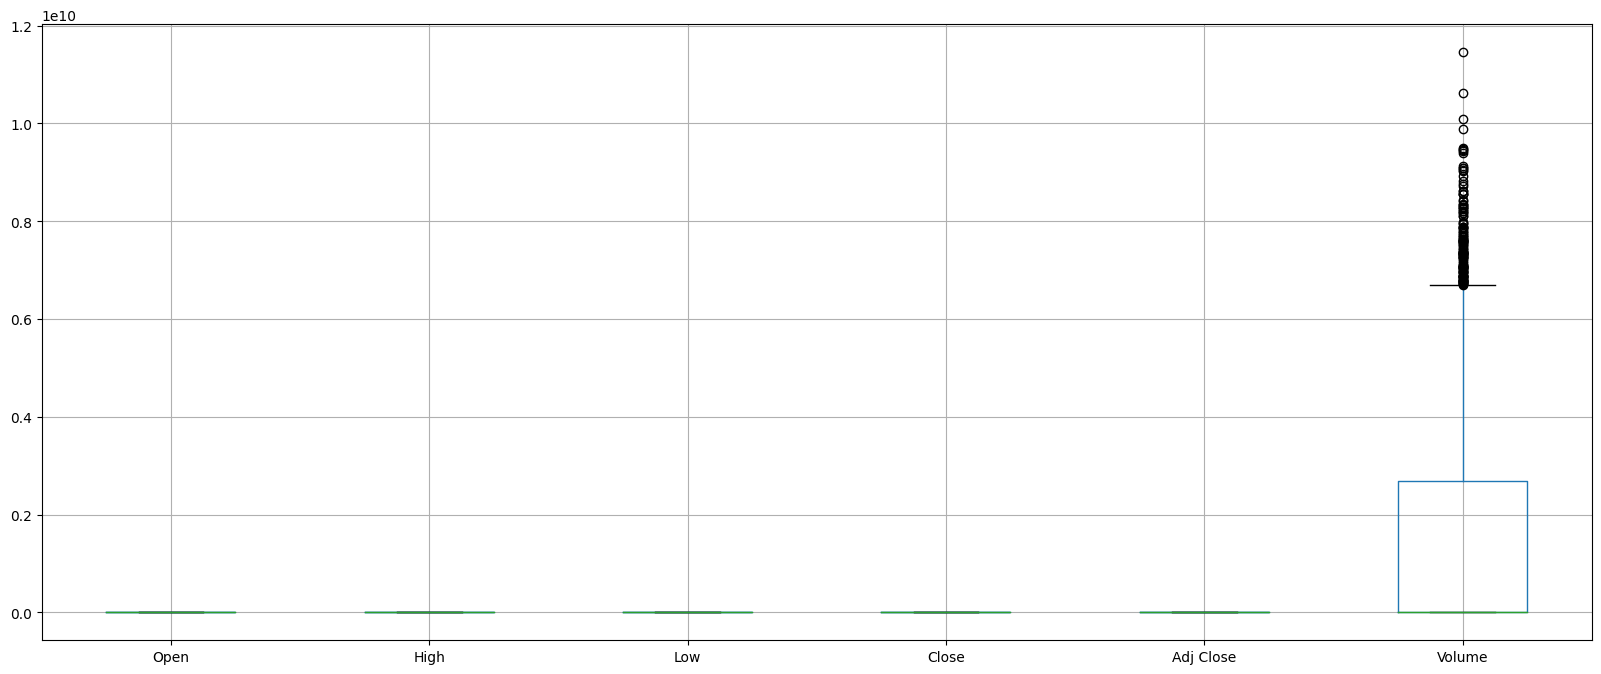

In [19]:
# Outliers
df.boxplot(figsize=(20,8))

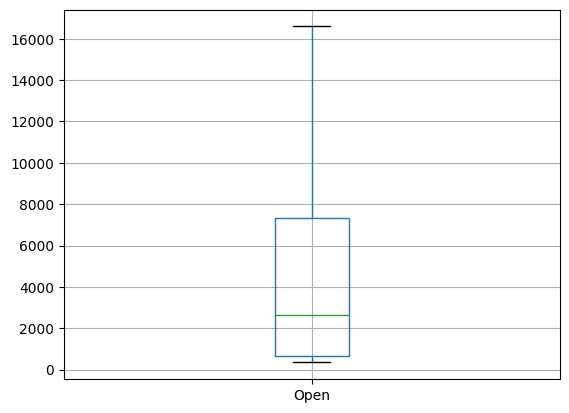

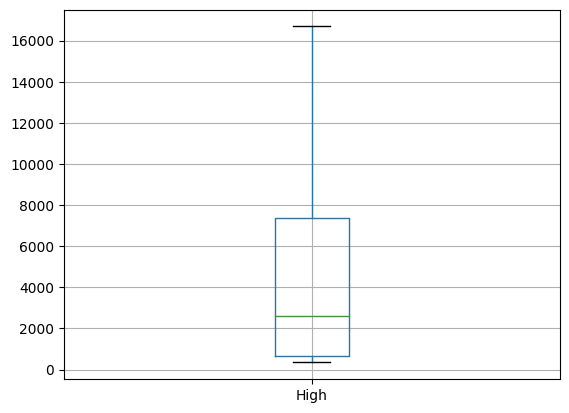

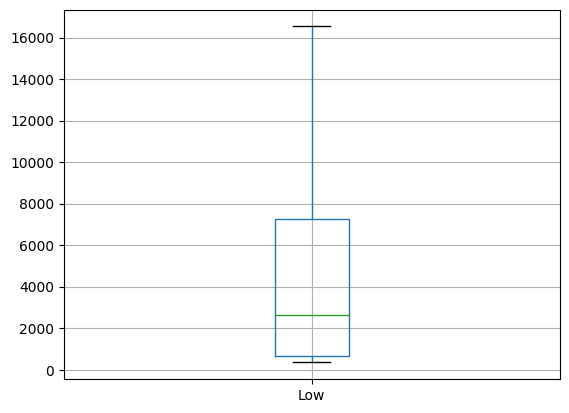

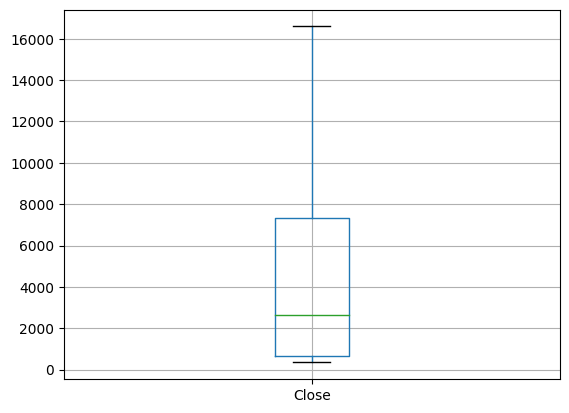

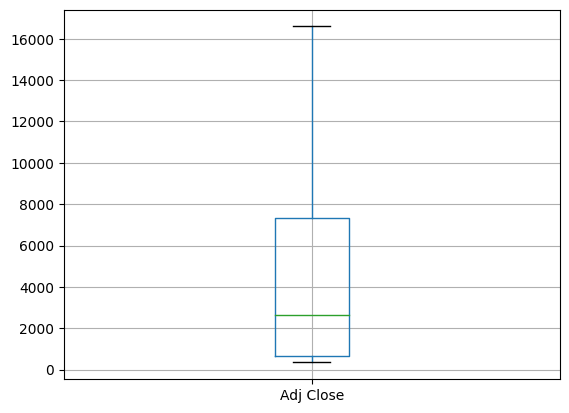

In [21]:
# Plot a boxplot excluding the Volume column
columns = ['Open', 'High', 'Low', 'Close', "Adj Close"]
for columm in columns:
    #boxplot
    df.boxplot(column=columm)
    plt.show()

In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain outliers and explore their relationship with other variables.

q25, q75 = np.percentile(df['Open'], 25), np.percentile(df['Open'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=654.940, 75th=7339.490, IQR=6684.550


In [23]:
# Calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Cut Off: %.3f' % cut_off)
print('Lower: %.3f' % lower)
print('Upper: %.3f' % upper)

Cut Off: 10026.825
Lower: -9371.885
Upper: 17366.315


In [24]:
# Identify outliers
outliers = [x for x in df['Open'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 0


In [25]:
# Remove outliers
outliers_removed = [x for x in df['Open'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 13947


In [26]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain outliers and explore their relationship with other variables.

columns = ['Open', 'High', 'Low', 'Close', "Adj Close", "Volume"]

for column in columns:
    print(column)
    q25, q75 = np.percentile(df[column], 25), np.percentile(df[column], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # Calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: %.3f' % cut_off)
    print('Lower: %.3f' % lower)
    print('Upper: %.3f' % upper)
    # Identify outliers
    outliers = [x for x in df[column] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # Remove outliers
    outliers_removed = [x for x in df[column] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    print()

Open
Percentiles: 25th=654.940, 75th=7339.490, IQR=6684.550
Cut Off: 10026.825
Lower: -9371.885
Upper: 17366.315
Identified outliers: 0
Non-outlier observations: 13947

High
Percentiles: 25th=654.940, 75th=7375.720, IQR=6720.780
Cut Off: 10081.170
Lower: -9426.230
Upper: 17456.890
Identified outliers: 0
Non-outlier observations: 13947

Low
Percentiles: 25th=654.940, 75th=7276.890, IQR=6621.950
Cut Off: 9932.925
Lower: -9277.985
Upper: 17209.815
Identified outliers: 0
Non-outlier observations: 13947

Close
Percentiles: 25th=654.940, 75th=7337.935, IQR=6682.995
Cut Off: 10024.493
Lower: -9369.553
Upper: 17362.428
Identified outliers: 0
Non-outlier observations: 13947

Adj Close
Percentiles: 25th=654.940, 75th=7337.935, IQR=6682.995
Cut Off: 10024.493
Lower: -9369.553
Upper: 17362.428
Identified outliers: 0
Non-outlier observations: 13947

Volume
Percentiles: 25th=0.000, 75th=2681975000.000, IQR=2681975000.000
Cut Off: 4022962500.000
Lower: -4022962500.000
Upper: 6704937500.000
Identified

# EDA

In [29]:
df_time = df.set_index('Date')
df_time.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


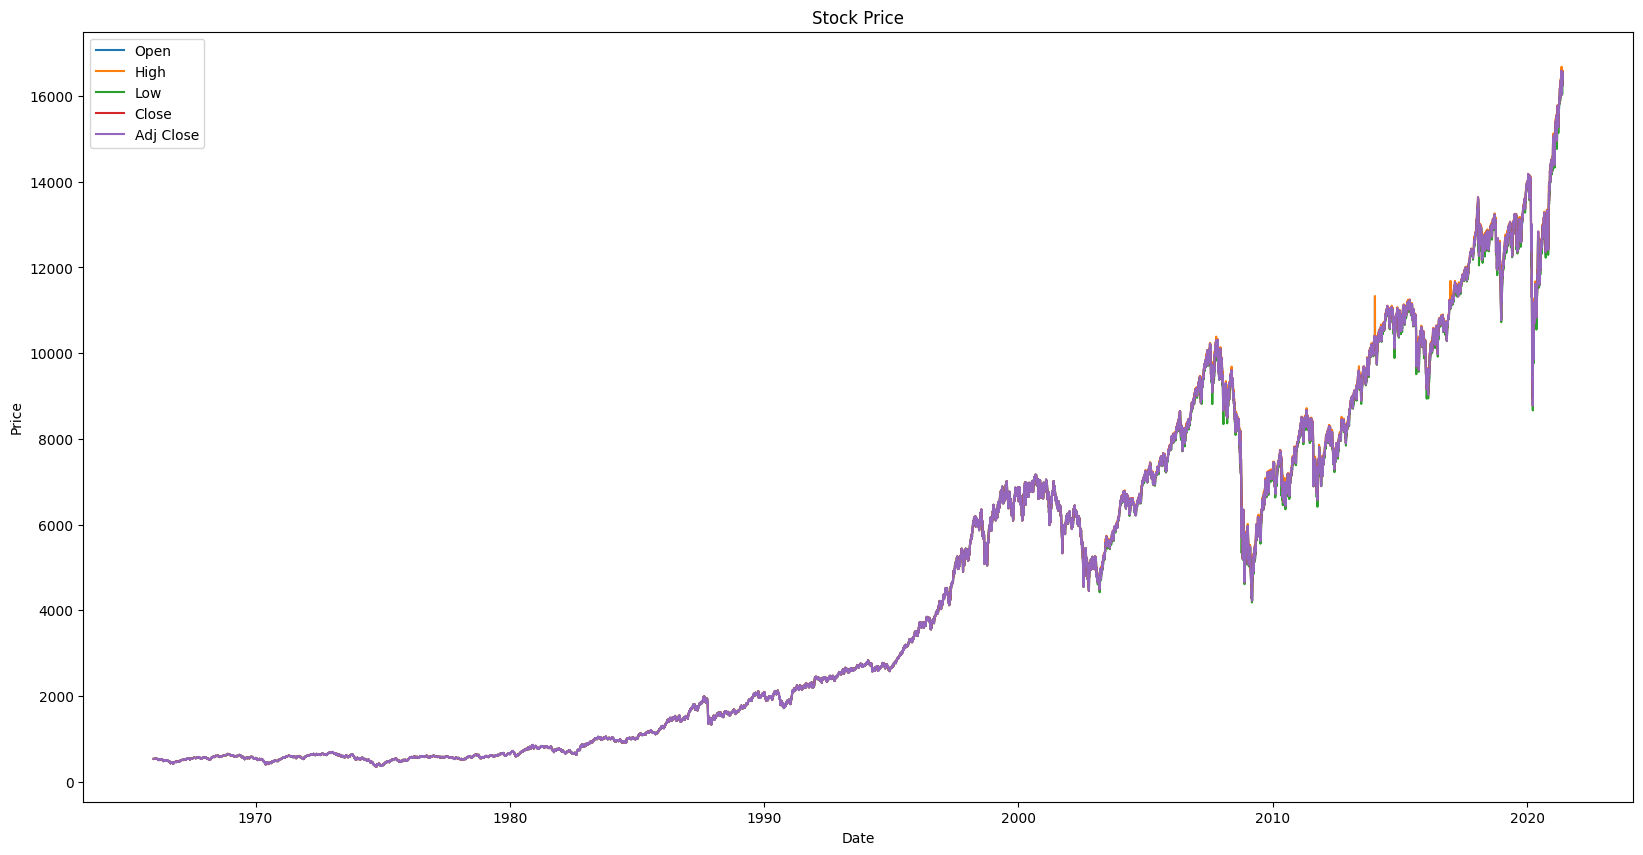

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_time.index, df_time['Open'], label='Open')
ax.plot(df_time.index, df_time['High'], label='High')
ax.plot(df_time.index, df_time['Low'], label='Low')
ax.plot(df_time.index, df_time['Close'], label='Close')
ax.plot(df_time.index, df_time['Adj Close'], label='Adj Close')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Stock Price')
ax.legend()
plt.show()

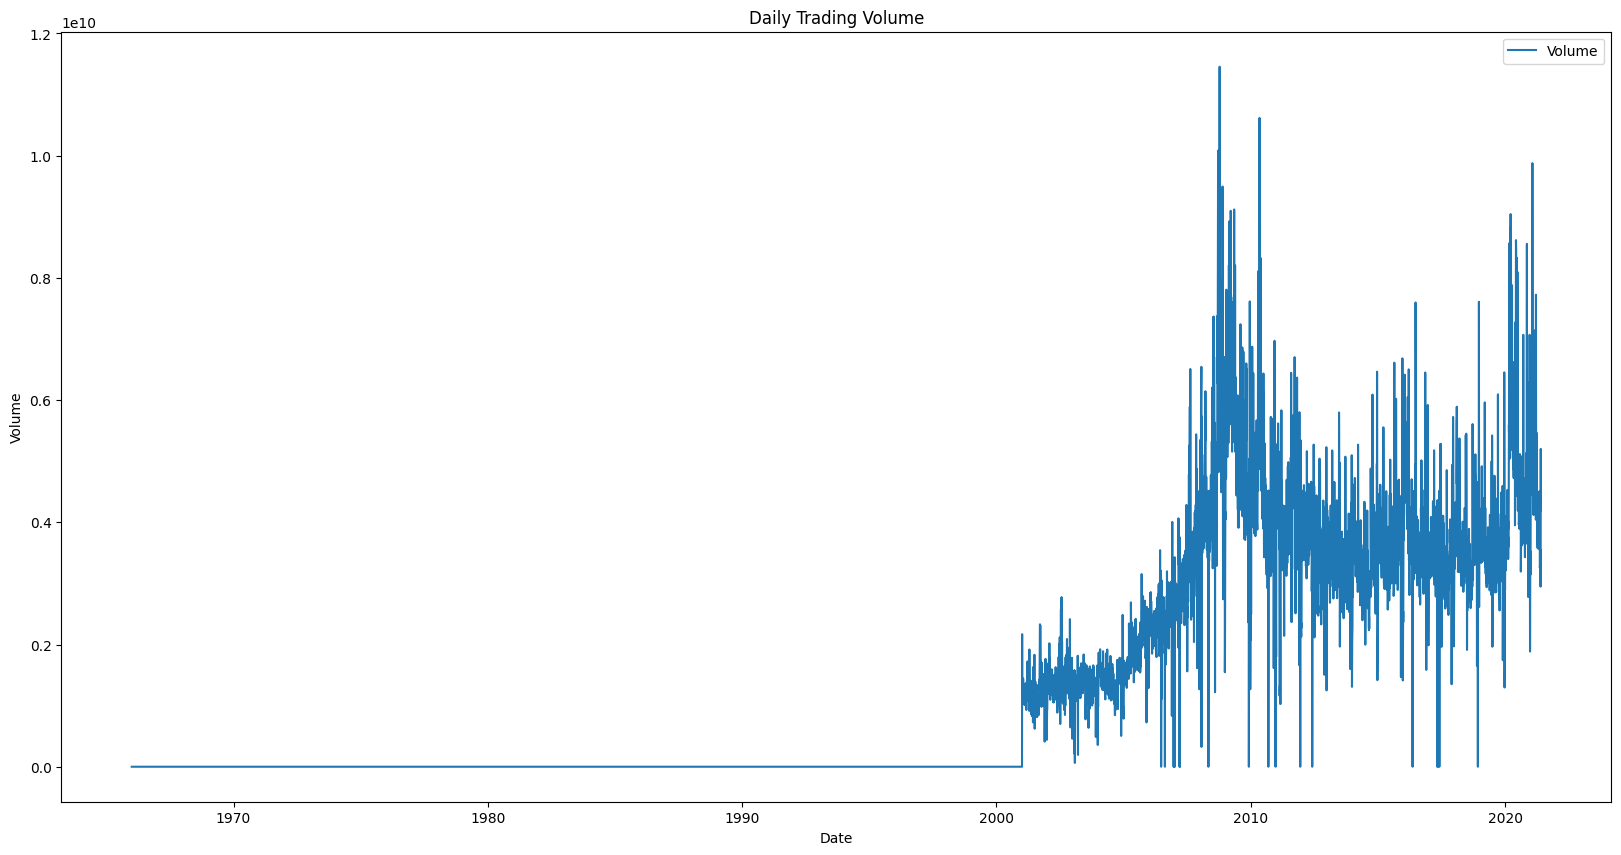

In [33]:
# Plot the daily trading volume
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_time.index, df_time['Volume'], label='Volume')
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.set_title('Daily Trading Volume')
ax.legend()
plt.show()

In [34]:
# Correlation Matrix
df.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.935295,0.935499,0.935026,0.935279,0.935279,0.785788
Open,0.935295,1.000000,0.999963,0.999937,0.999912,0.999912,0.801175
High,0.935499,0.999963,1.000000,0.999912,0.999949,0.999949,0.803457
Low,0.935026,0.999937,0.999912,1.000000,0.999958,0.999958,0.798041
Close,0.935279,0.999912,0.999949,0.999958,1.000000,1.000000,0.800783
Adj Close,0.935279,0.999912,0.999949,0.999958,1.000000,1.000000,0.800783
Volume,0.785788,0.801175,0.803457,0.798041,0.800783,0.800783,1.000000


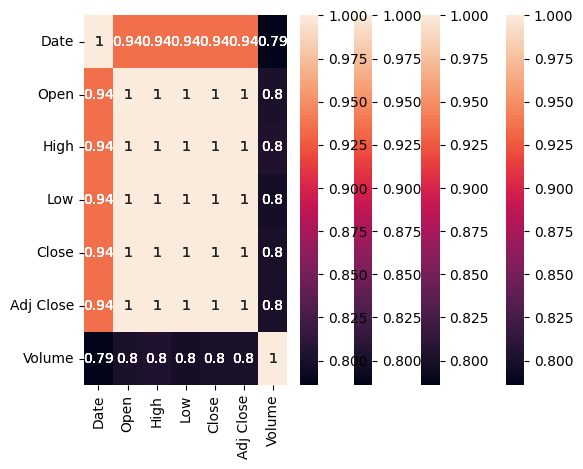

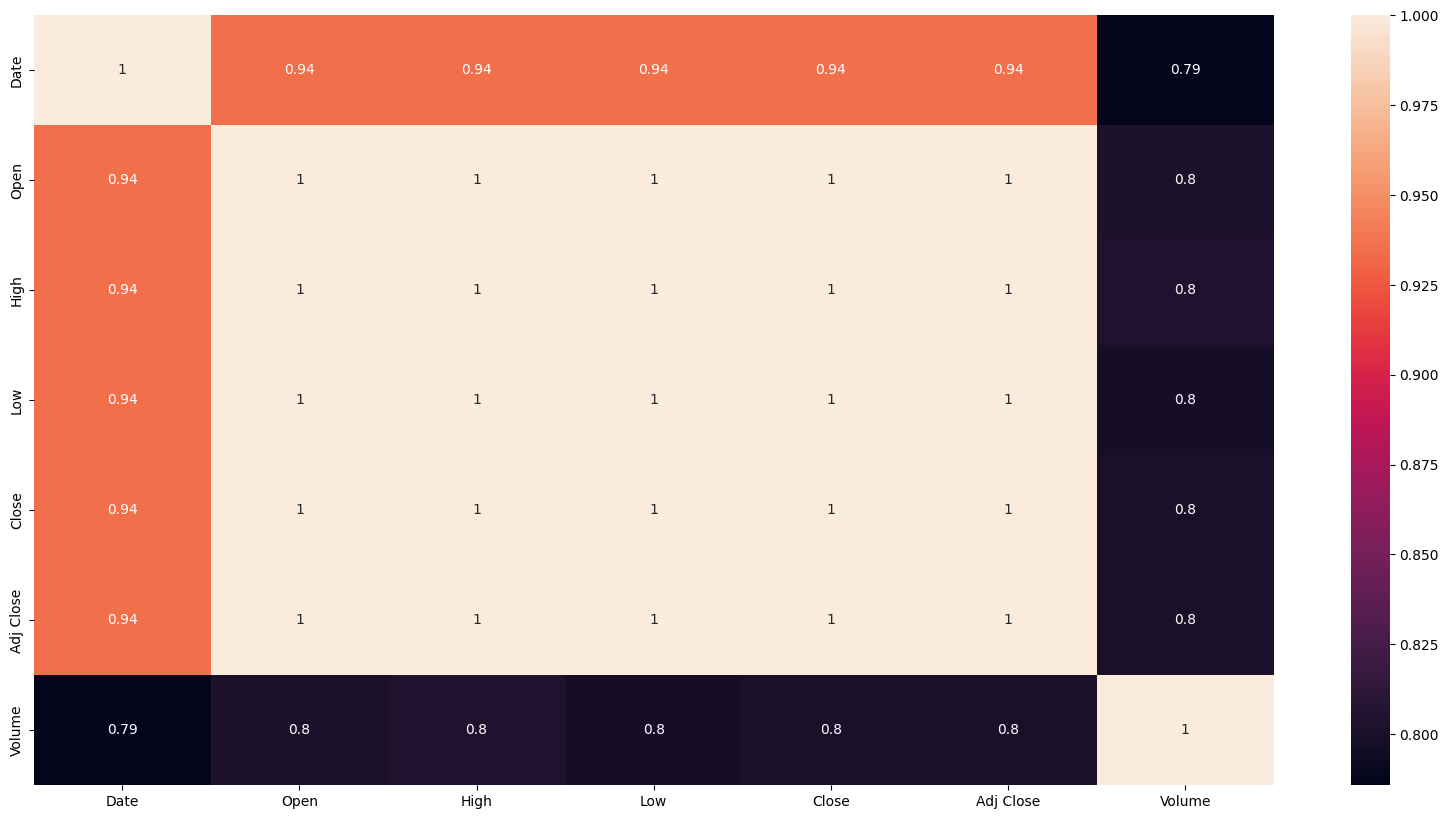

In [40]:
# Plot the correlation matrix
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

# Feature Engineering

In [41]:
df_time.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [42]:
# Calculate the daily returns
df_time['Daily Returns'] = df_time['Adj Close'].pct_change()

In [43]:
df_time.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,NaN
1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,-0.002799
1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,0.001195
1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,0.006214
1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,0.001789


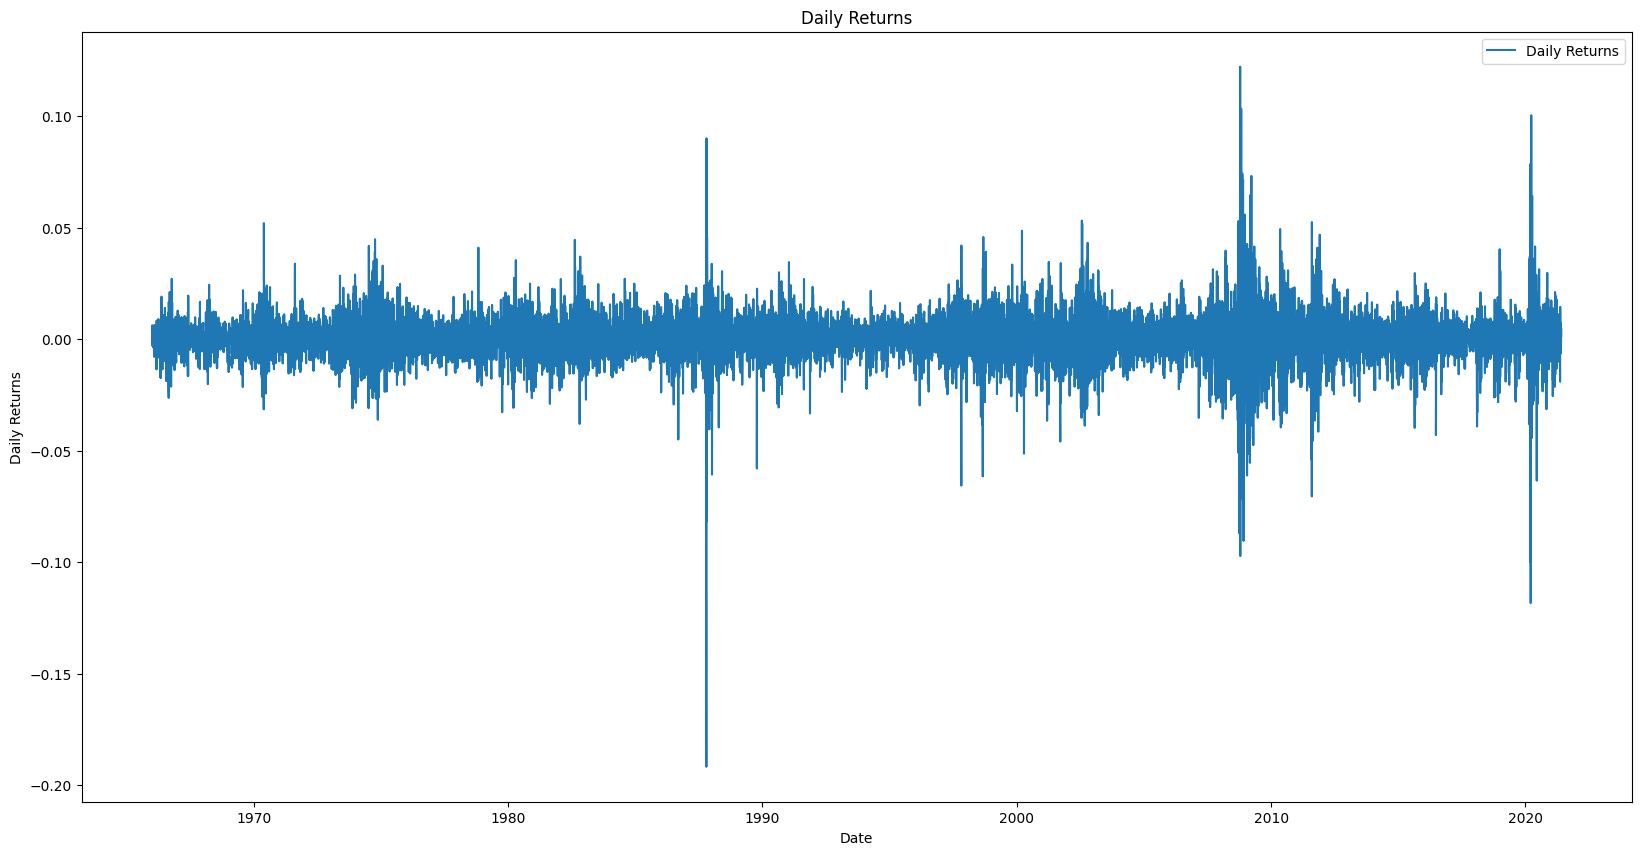

In [44]:
# Plot the daily returns
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_time.index, df_time['Daily Returns'], label='Daily Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns')
ax.set_title('Daily Returns')
ax.legend()
plt.show()

In [45]:
# Calculate the cumulative returns
df_time['Cumulative Returns'] = (1 + df_time['Daily Returns']).cumprod()

In [46]:
df_time.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Cumulative Returns
Date,,,,,,,,
1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,NaN,NaN
1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,-0.002799,0.997201
1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,0.001195,0.998392
1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,0.006214,1.004596
1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,0.001789,1.006393


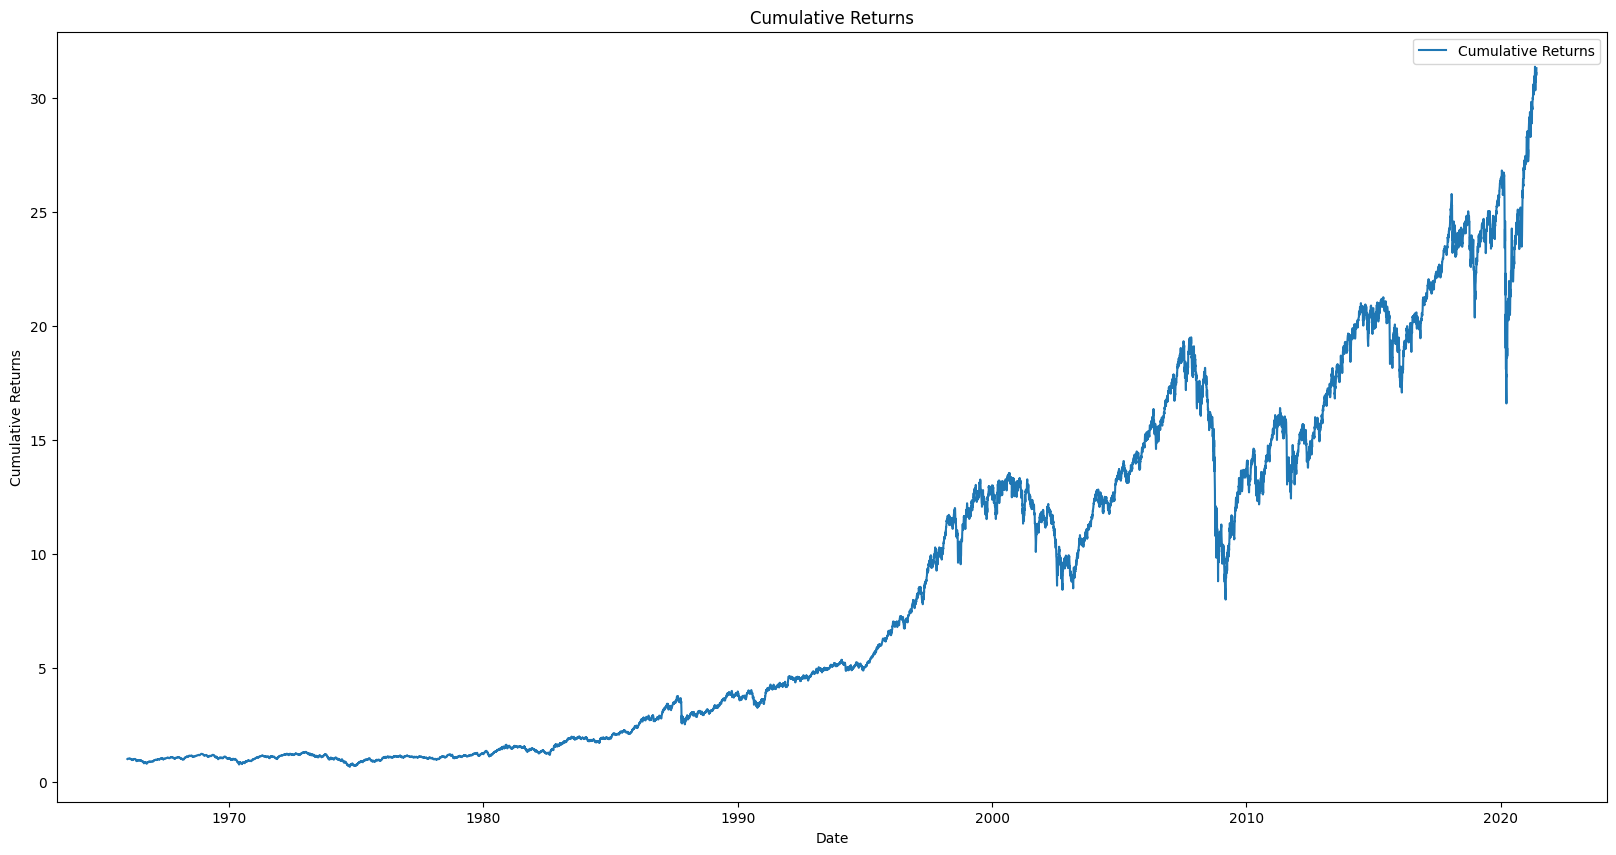

In [47]:
# Plot the cumulative returns
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_time.index, df_time['Cumulative Returns'], label='Cumulative Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
ax.set_title('Cumulative Returns')
ax.legend()
plt.show()

In [48]:
# Calculate log returns
df_time['Log Returns'] = np.log(df_time['Adj Close']/df_time['Adj Close'].shift(1))

In [49]:
df_time.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Cumulative Returns,Log Returns
Date,,,,,,,,,
1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,NaN,NaN,NaN
1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,-0.002799,0.997201,-0.002803
1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,0.001195,0.998392,0.001194
1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,0.006214,1.004596,0.006195
1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,0.001789,1.006393,0.001787


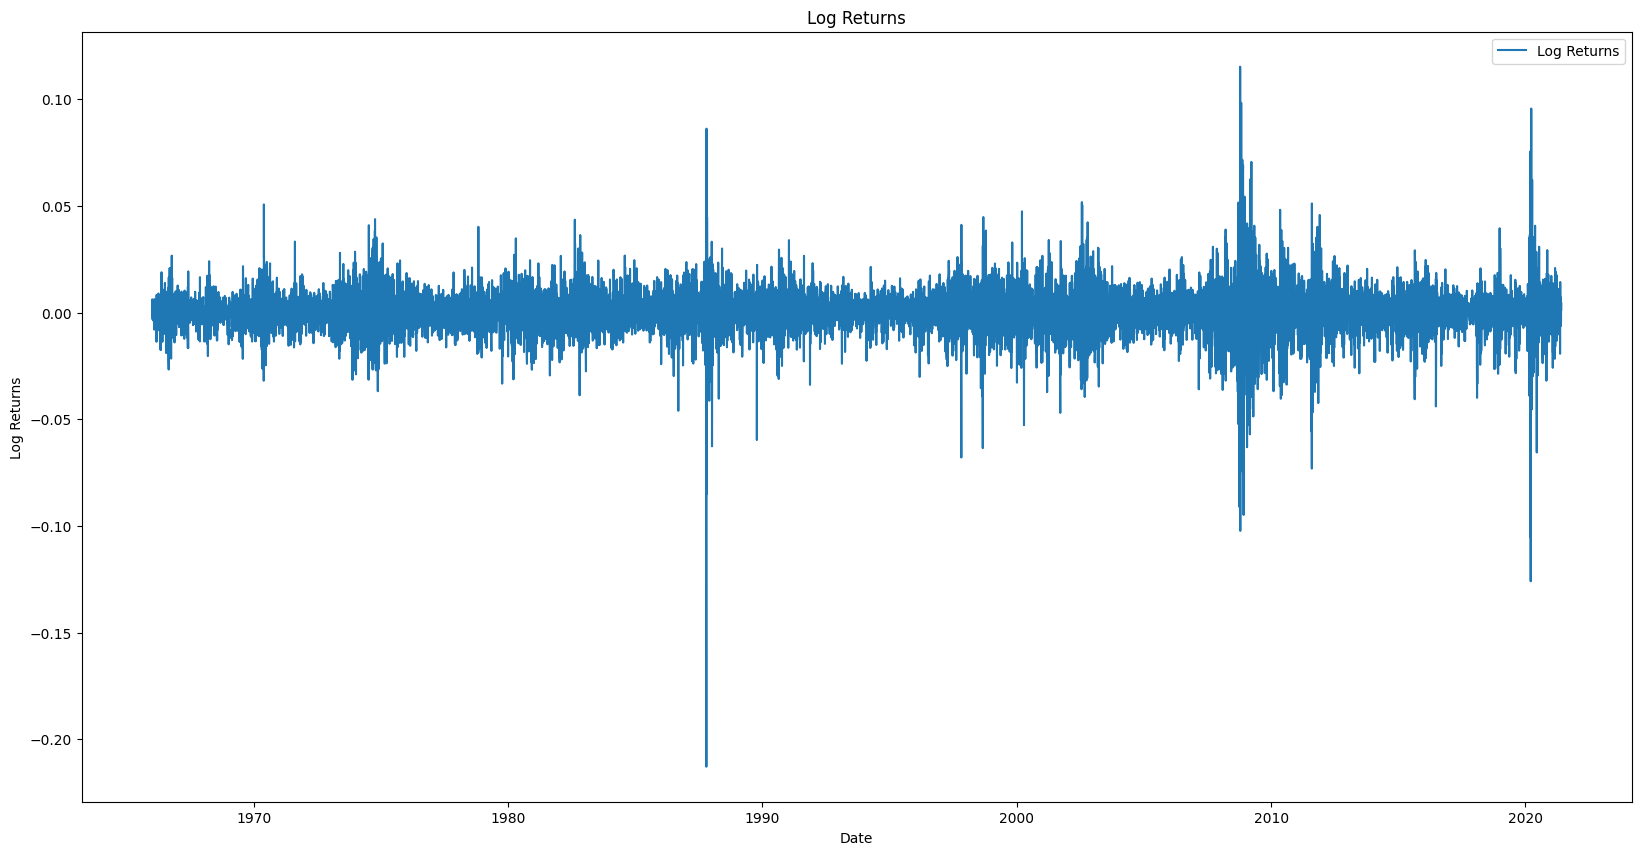

In [50]:
# Plot the log returns
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_time.index, df_time['Log Returns'], label='Log Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Log Returns')
ax.set_title('Log Returns')
ax.legend()
plt.show()

# Data Normalization

In [51]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
df_time_scaled = pd.DataFrame(scaler.fit_transform(df_time), columns=df_time.columns)

In [52]:
df_time_scaled.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Cumulative Returns,Log Returns
0,0.011139,0.011073,0.011179,0.011139,0.011139,0.0,NaN,NaN,NaN
1,0.011047,0.010983,0.011087,0.011047,0.011047,0.0,0.601900,0.011047,0.640191
2,0.011086,0.011021,0.011126,0.011086,0.011086,0.0,0.614625,0.011086,0.652374
3,0.011288,0.011222,0.011329,0.011288,0.011288,0.0,0.630614,0.011288,0.667613
4,0.011347,0.011280,0.011388,0.011347,0.011347,0.0,0.616517,0.011347,0.654181


In [72]:
# Delete the first row
df_time_scaled = df_time_scaled.iloc[1:]
df_time_scaled.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Cumulative Returns,Log Returns
3,0.011288,0.011222,0.011329,0.011288,0.011288,0.0,0.630614,0.011288,0.667613
4,0.011347,0.011280,0.011388,0.011347,0.011347,0.0,0.616517,0.011347,0.654181
5,0.011379,0.011313,0.011420,0.011379,0.011379,0.0,0.613991,0.011379,0.651768
6,0.011457,0.011391,0.011499,0.011457,0.011457,0.0,0.618415,0.011457,0.655993
7,0.011483,0.011416,0.011525,0.011483,0.011483,0.0,0.613324,0.011483,0.651131


# Data Preparation

In [79]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Define features
X = df_time_scaled[['Open', 'High', 'Low', 'Close', 'Volume']]
# Define target
y = df_time_scaled['Adj Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [80]:
# Check the shape of the training and testing sets
print(X_train.shape, y_train.shape)

(11155, 5) (11155,)


In [81]:
print(X_test.shape, y_test.shape)

(2789, 5) (2789,)


In [82]:
# Convert the data into numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [83]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [84]:
# Check the shape of the training and testing sets
print(X_train.shape, y_train.shape)

(11155, 1, 5) (11155,)


In [85]:
print(X_test.shape, y_test.shape)

(2789, 1, 5) (2789,)


In [88]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Initialize the LSTM model
model = Sequential()

# Add a LSTM layer with 50 neurons
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(.2))

# Add a LSTM layer with 50 neurons
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(.2))

# Add a LSTM layer with 50 neurons
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(.2))

# Add a dense layer with 1 neuron 
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summarize the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 50)             11200     
                                                                 
 dropout_3 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [89]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
349/349 [==============================] - 6s 4ms/step - loss: 0.0115
Epoch 2/100
349/349 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 3/100
349/349 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 4/100
349/349 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 5/100
349/349 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 6/100
349/349 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 7/100
349/349 [==============================] - 1s 4ms/step - loss: 0.0010
Epoch 8/100
349/349 [==============================] - 1s 4ms/step - loss: 9.9107e-04
Epoch 9/100
349/349 [==============================] - 1s 4ms/step - loss: 9.2730e-04
Epoch 10/100
349/349 [==============================] - 1s 4ms/step - loss: 9.2666e-04
Epoch 11/100
349/349 [==============================] - 1s 4ms/step - loss: 9.4302e-04
Epoch 12/100
349/349 [==============================] - 1s 4ms/step - loss: 9.01

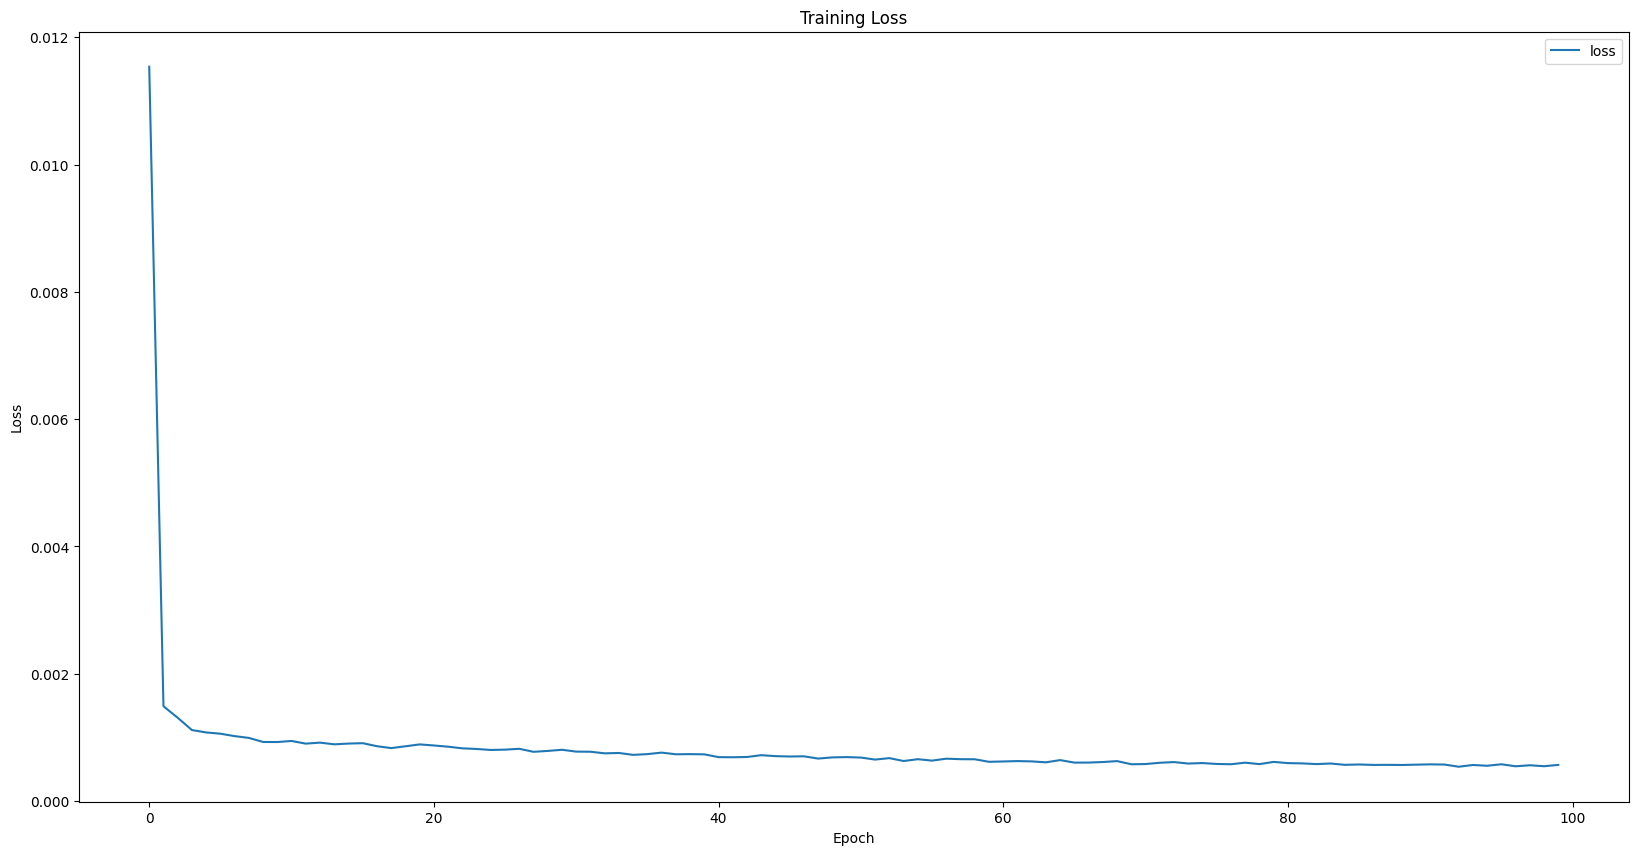

In [90]:
# Plot the training loss
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(model.history.history['loss'], label='loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Training Loss')
ax.legend()
plt.show()

In [94]:
X_test.shape

(2789, 1, 5)

In [95]:
# Make predictions
y_pred = model.predict(X_test)

88/88 [==============================] - 0s 2ms/step


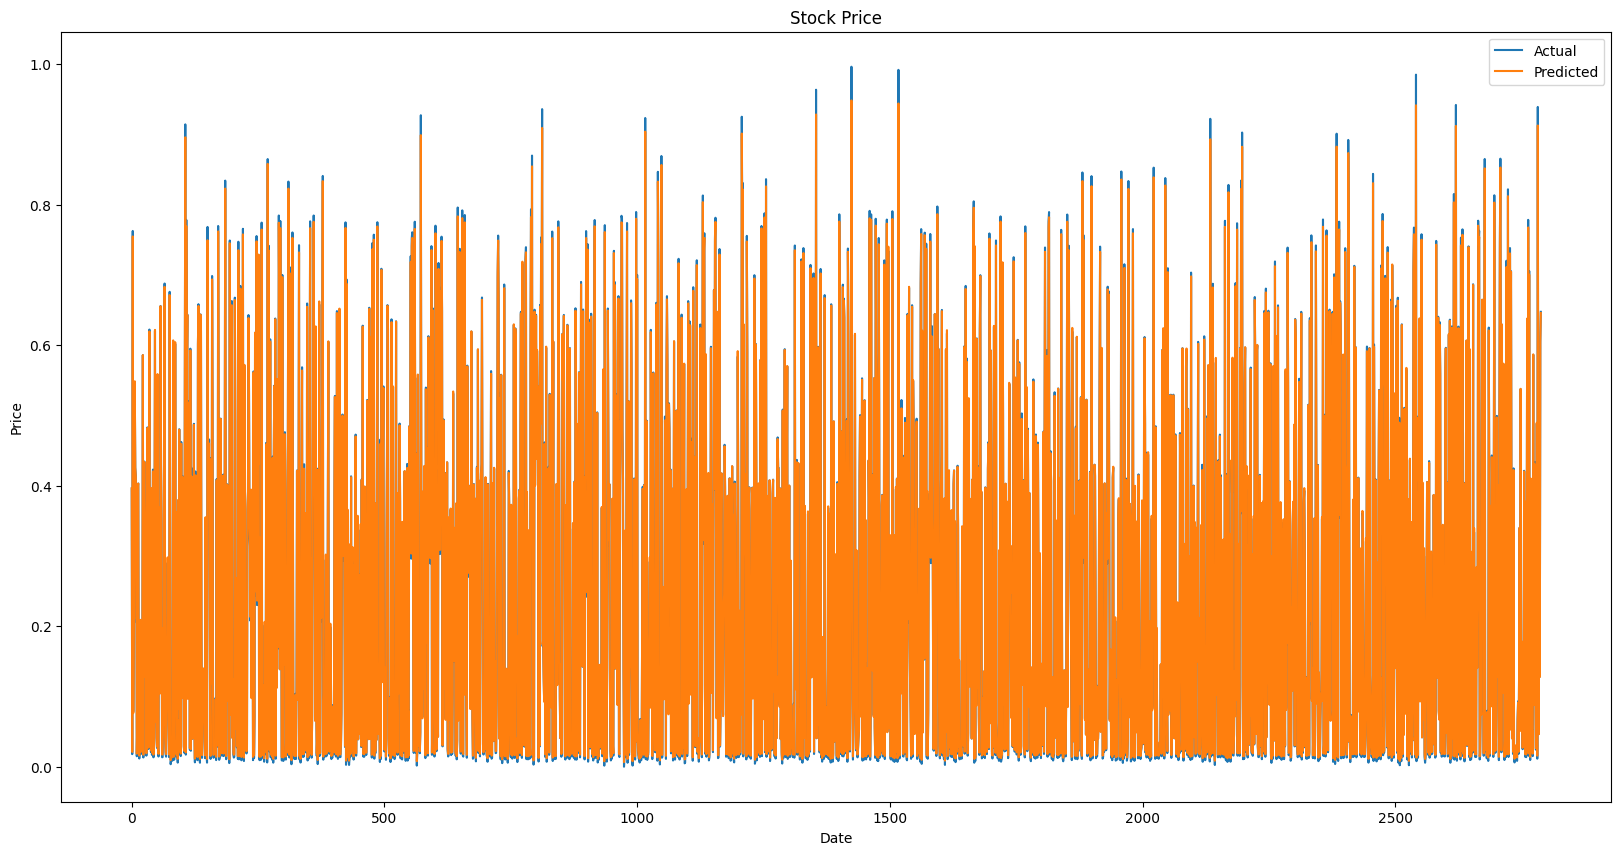

In [98]:
# Plot the predictions and the actual values
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test, label='Actual')
ax.plot(y_pred, label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Stock Price')
ax.legend()
plt.show()



In [99]:
# Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

MAE: 0.003
